In [58]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM
from astropy import constants as const
from scipy.interpolate import interp1d
from tqdm import tqdm

In [59]:
os.chdir("/home/benardorci/SimulationData")
os.getcwd()

'/home/benardorci/SimulationData'

In [60]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_10000.npy")
CheckingEverythingIsAlright = 117

In [61]:
# MassBins, where:  

MassBin1 = []    #         MB >= 1e15
MassBin2 = []    # 5e14 <= MB <1e15
MassBin3 = []    # 1e14 <= MB <5e14
MassBin4 = []    # 5e13 <= MB <1e14
MassBin5 = []    # 1e13 <= MB <5e13
MassBin6 = []    #         MB < 1e13

for m, x, y, z, Vx, Vy, Vz in zip(Halos[:,0], Halos[:,1], Halos[:,2], Halos[:,3], Halos[:,4], Halos[:,5], Halos[:,6]) :
    if m >= 1.0*10**13.5 :
        MassBin1.append([m, x, y, z, Vx, Vy, Vz])
#    if m >= 1.0*10**15 :
 #       MassBin1.append([m, x, y, z, Vx, Vy, Vz])
  #  elif m >= 5.0*10**14 :
   #     MassBin2.append([m, x, y, z, Vx, Vy, Vz])
    #elif m >= 1.0*10**14 :
     #   MassBin3.append([m, x, y, z, Vx, Vy, Vz])
#    elif m >= 5.0*10**13 :
 #       MassBin4.append([m, x, y, z, Vx, Vy, Vz])
  #  elif m >= 1.0*10**13 :
   #     MassBin5.append([m, x, y, z, Vx, Vy, Vz])
    #else :
     #   MassBin6.append([m, x, y, z, Vx, Vy, Vz])

MassBin1 = np.array(MassBin1)
MassBin2 = np.array(MassBin2)
MassBin3 = np.array(MassBin3)
MassBin4 = np.array(MassBin4)
MassBin5 = np.array(MassBin5)
MassBin6 = np.array(MassBin6)

In [62]:
#-----------------------------------------------------------------------------------------
#
# NewDMPBoxShell will not be complete is both the Radius and the HalfHeight parameters are
# bigger than 525.
#
#-----------------------------------------------------------------------------------------

In [63]:
Radius = 10
HalfHeight = 525

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            
    elif  x > 1050-Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO

In [64]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :
        if y < Radius :    
            NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA        
        elif y > 1050-Radius :    
            NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA

    elif  x > 1050-Radius :
        if y < Radius :    
            NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA     
        elif y > 1050-Radius :    
            NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA

In [65]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if y < Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        
    elif y > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA

In [66]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :                
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA

    elif  x > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA

In [67]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :
        NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
            
    elif  x > 1050-Radius :
        NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA

In [68]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if y < Radius :
        NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y > 1050-Radius :
        NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA

In [69]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if z < HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #CARA             
                  
    elif z > 1050-HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #CARA

In [70]:
DMP[:,1] = DMP[:,1] + Radius 
DMP[:,2] = DMP[:,2] + Radius 
DMP[:,3] = DMP[:,3] + HalfHeight

In [71]:
print(CheckingEverythingIsAlright)

117


In [72]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [73]:
print(CheckingEverythingIsAlright)

117


In [74]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

DistanceOfRS0dot3 = cosmo.comoving_distance(0.3)
DistanceOfRS0dot3 = DistanceOfRS0dot3.value

# -------------------------------------- INTERPOLATION --------------------------------------

MPCMin = z_at_value(cosmo.comoving_distance, 0.001*u.Mpc)
MPCMax = z_at_value(cosmo.comoving_distance, 1800*u.Mpc) # ~1200 + 525 = 1725 < 1800 MPC
RSgrid = np.linspace(MPCMin, MPCMax, 50000)
MPCgrid = cosmo.comoving_distance(RSgrid)

MPCtoRSInterpolation = interp1d(MPCgrid, RSgrid)   

# -------------------------------------- INTERPOLATION --------------------------------------

TemporaryFrameOfReference = np.zeros((np.size(NewDMPBox[:,3]),3))

In [75]:
print(CheckingEverythingIsAlright)

117


In [76]:
ID = 0

UpperMPCDistanceLimit = DistanceOfRS0dot3 + 525 # In this case, the size of the DMP box is 1050 MPC, so we are
LowerMPCDistanceLimit = DistanceOfRS0dot3 - 525 # taking half of that upwards and downwards form the halo of 

TemporaryMasses = []
TemporaryRedshifts = []
TemporaryAngles = []

AngleAt0dot3RS = np.radians(0.3)

DMPBoxMassesAll = []
DMPBoxRedshiftsAll = []
DMPBoxAnglesAll = []

FinalVelocities = []

In [77]:
for QQ in tqdm(MassBin1[:,0]) :

    # New frame of reference (The Halo that was selected).

    TemporaryFrameOfReference[:,0] = NewDMPBox[:,1] - (MassBin1[ID,1] + Radius)
    TemporaryFrameOfReference[:,1] = NewDMPBox[:,2] - (MassBin1[ID,2] + Radius)
    TemporaryFrameOfReference[:,2] = NewDMPBox[:,3] - (MassBin1[ID,3] + HalfHeight) + DistanceOfRS0dot3

    # Filter 1: Index numbers for vertical range.
    
    IndexNumbers = np.where((TemporaryFrameOfReference[:,2] >= LowerMPCDistanceLimit) &
                            (TemporaryFrameOfReference[:,2] <= UpperMPCDistanceLimit))[0]

    # Interpolate those numbers.
    
    InterpolatedRS = MPCtoRSInterpolation(TemporaryFrameOfReference[IndexNumbers,2])
    
    # Save their respective parameter on their temporary arrays.
    
    TemporaryMasses = NewDMPBox[IndexNumbers,0]
    TemporaryRedshifts = InterpolatedRS + (NewDMPBox[IndexNumbers,6]/const.c.value)*(1/(1+InterpolatedRS))
    TemporaryAngles = np.arctan(np.sqrt(TemporaryFrameOfReference[IndexNumbers,0]**2 + TemporaryFrameOfReference[IndexNumbers,1]**2)/TemporaryFrameOfReference[IndexNumbers,2])
    
    # Filter 2: Index numbers angles.
    
    IndexNumbers = np.where(TemporaryAngles <= AngleAt0dot3RS)[0]
    
    # Save their respective parameter on their final arrays.
    
    DMPBoxMassesAll = np.append(DMPBoxMassesAll, TemporaryMasses[IndexNumbers])
    DMPBoxRedshiftsAll = np.append(DMPBoxRedshiftsAll, TemporaryRedshifts[IndexNumbers])    
    DMPBoxAnglesAll = np.append(DMPBoxAnglesAll, TemporaryAngles[IndexNumbers])
    
    # Calculate the Halo's redshift (currente iteration Halo).
    
    HaloTotalRedshift = (MassBin1[ID,6]/const.c.value)*(1/(1+0.3)) + 0.3
                        
    # Save the (filtered) DMP velocities
                         
    FinalVelocities = np.append(FinalVelocities, const.c.value*(TemporaryRedshifts[IndexNumbers]-HaloTotalRedshift)/((1+HaloTotalRedshift)*1000))   
    
    ID = ID + 1

100%|██████████| 264149/264149 [6:49:05<00:00,  7.59it/s]  


In [78]:
print(CheckingEverythingIsAlright)

117


In [79]:
np.size(FinalVelocities)

9018612

In [80]:
#np.savetxt("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.txt",FinalVelocities,fmt='%s')

In [81]:
#plt.hist(FinalVelocities, bins=100, histtype='bar', stacked=True)
#plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin#HistogramsDS1000.png")

In [82]:
print(CheckingEverythingIsAlright)

117


In [83]:
#np.save("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.npy",FinalVelocities)
################################################################################################################
np.save("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin13.5-Redshift.npy",DMPBoxRedshiftsAll)
np.save("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin13.5-Angle.npy",DMPBoxAnglesAll)
np.save("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin13.5-Mass.npy",DMPBoxMassesAll)
np.save("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin13.5-VelocitiesNotFiltered.npy",FinalVelocities)

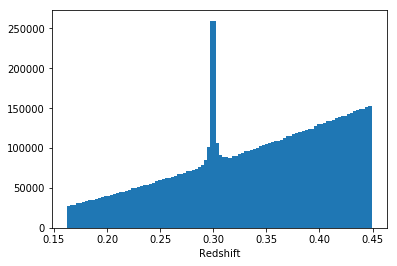

<Figure size 432x288 with 0 Axes>

In [84]:
plt.hist(DMPBoxRedshiftsAll, bins=100) #density=True
plt.xlabel("Redshift")
plt.show()
#plt.savefig("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.png")
################################################################################################################
plt.savefig("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin13.5-Redshift.png")

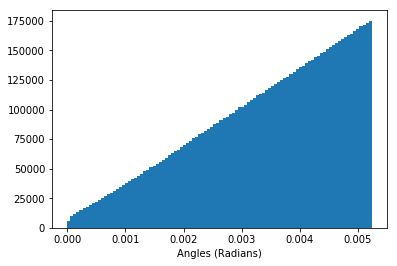

In [85]:
plt.hist(DMPBoxAnglesAll, bins=100) #density=True
plt.xlabel("Angles (Radians)")
plt.show()

In [86]:
V = []

for Vz, m in zip(FinalVelocities,DMPBoxMassesAll) :
    if (-3000 <= Vz <= 3000) :
        V.append([m,Vz])
        
V = np.array(V)

################################################################################################################
np.save("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin13.5-Mass-VelocityFiltered.npy",V)

In [87]:
print(np.size(V))
print(V[:,0].max())
print(V[:,1].max())

NewDMPBoxShell = np.array(NewDMPBoxShell)

print(DMP[:,0].size)
print(NewDMPBoxShell[:,0].size)

2320026
2743988554.0
2999.989623624122
274140
295032


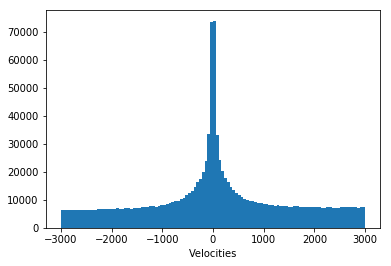

In [96]:
plt.hist(V[:,1], bins=110)
plt.xlabel("Velocities")
plt.show()
################################################################################################################
#plt.savefig("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin13.5-Velocity-200bins.png")

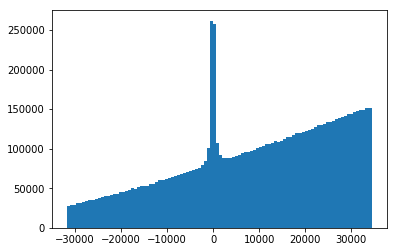

In [89]:
plt.hist(FinalVelocities, bins=100)
plt.show()

In [90]:
cosmo.angular_diameter_distance(0.3)

<Quantity 918.76682286 Mpc>

In [91]:
print(np.size(MassBin1[:,0]))
#print(np.size(MassBin2[:,0]))
#print(np.size(MassBin3[:,0]))
#print(np.size(MassBin4[:,0]))
#print(np.size(MassBin5[:,0]))
#print(np.size(MassBin6[:,0]))

264149


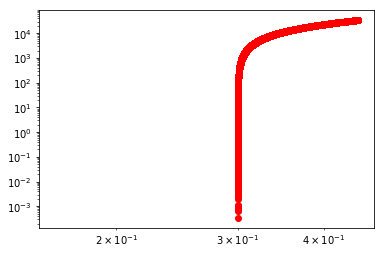

In [92]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.plot(DMPBoxMassesAll, FinalVelocities,'ro')
plt.show()

